Previsão com Regressão Linear – parte 1

Modelo capaz de prever o peso de uma pessoa através de sua altura



15 15


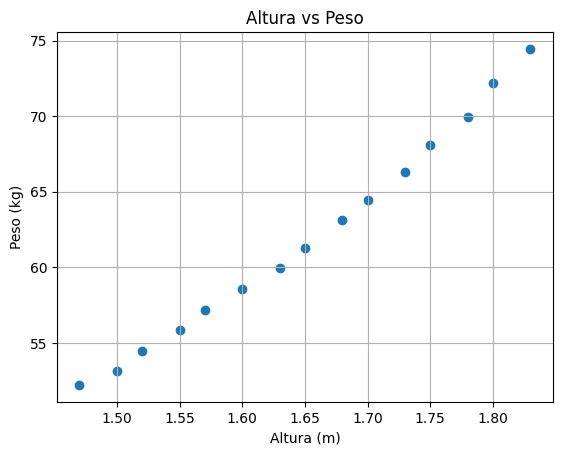

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Exemplo de dados
height = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70,
1.73, 1.75, 1.78, 1.80, 1.83])
weight = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,
63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])

plt.scatter(height , weight) # cria um plot de dispersão com x e y
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Altura vs Peso')
plt.grid()

print(np.size(height), np.size(weight))

Após a criação da função:
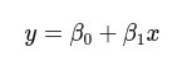

Utilizamos os Mínimos Quadrados para procurar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados

Referência utilizada:
https://www.uel.br/projetos/matessencial/superior/alinear/mmq.html

In [ ]:
# Função para o calculo da regressão

class LinearRegression:
    def __init__(self):
        self.w0 = 0  # Intercepto
        self.w1 = 0  # Coeficiente da inclinação

    def fit(self, X, y):
        """Ajusta o modelo aos dados de treinamento."""
        n = len(X)
        self.w1 = (n * np.dot(X.flatten(), y) - np.sum(X) * np.sum(y)) / (n * np.dot(X.flatten(), X) - np.sum(X) ** 2)
        self.w0 = np.mean(y) - self.w1 * np.mean(X)

    def predict(self, X):
        """Faz previsões com base nos dados de entrada."""
        return self.w0 + self.w1 * X


# caluculando os pesos (w0 e w1) atrave dos mínimos quadrados
n = len(height)
w1 = (n * np.dot(height, weight) - np.sum(height) * np.sum(weight)) / (n * np.dot(height, height) - np.sum(height) ** 2)
w0 = np.mean(weight) - w1 * np.mean(height)

print(f'Pesos calculados: w0 = {w0:.3f}, w1 = {w1:.3f}')

Pesos calculados: w0 = -39.062, w1 = 61.272


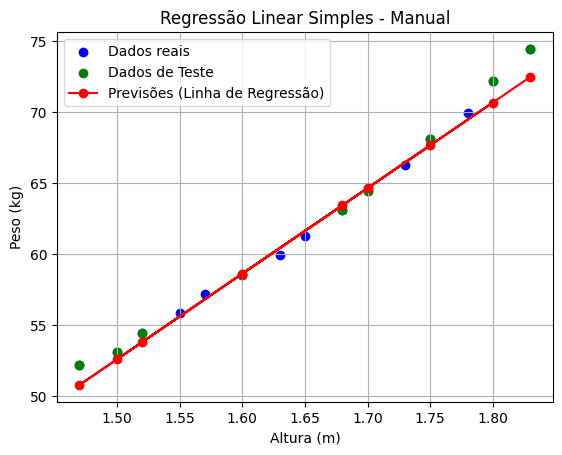

In [ ]:
#predicted_size = LiearRegression(w0, w1, height)
model = LinearRegression()

# separarndo em teste(20%) e treino
height_train, height_test, size_train, size_test = train_test_split(height, weight, test_size=0.6, random_state=42)
model.fit(height_train, size_train)

predicted_size_test = model.predict(height_test)

plt.scatter(height, weight, label='Dados reais', color='blue')  # Dados reais
plt.scatter(height_test, size_test, label='Dados de Teste', color='green')  # Dados de teste
plt.plot(height_test, predicted_size_test, color='red', label='Previsões (Linha de Regressão)', marker='o')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.title('Regressão Linear Simples - Manual')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Previsão para uma altura específica
height_input = 38 # Altura do crito redentor
predicted_weight = model.predict(np.array([height_input]))
print(f'A previsão de peso para o Cristo Redentor é de {predicted_weight[0]:.2f} kg.')

A previsão de peso para o Cristo Redentor é de 2356.83 kg.


O RSE mede a quantidade média que as previsões do modelo diferem dos valores reais. Quanto menor o RSE, melhor o modelo se ajusta aos dados. Ele é calculado da seguinte forma:


*   n é o número de observações,
*   yi são os valores reais (pesos observados),
*   ^yi são os valores previstos pelo modelo.

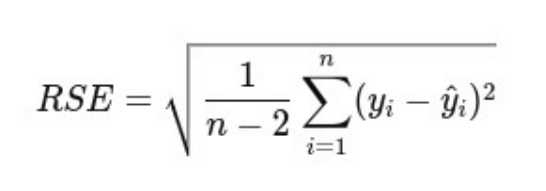

In [ ]:
# Cálculo do RSE
predicted_weight = model.predict(height)
residuals = weight - predicted_weight  # Erros
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Cálculo do R^2
SS_res = np.sum(residuals**2)  # Soma dos quadrados dos resíduos
SS_tot = np.sum((weight - np.mean(weight))**2)  # Soma total dos quadrados
R_squared = 1 - (SS_res / SS_tot)

# Resultados
print(f'Erro Padrão Residual (RSE): {RSE:.3f}')
print(f'Coeficiente de Determinação (R^2): {R_squared:.3f}')


Erro Padrão Residual (RSE): 0.792
Coeficiente de Determinação (R^2): 0.988


Fazendo a mesma coisa com um banco de dados real. Vamos utilizar o dataset tips, que
contém dados sobre gorjetas e pode ser usado para prever o valor da gorjeta com base em variáveis
como total da conta.


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Coeficiente (intercepto): w0 = 0.925
Coeficiente (slope): w1 = 0.107


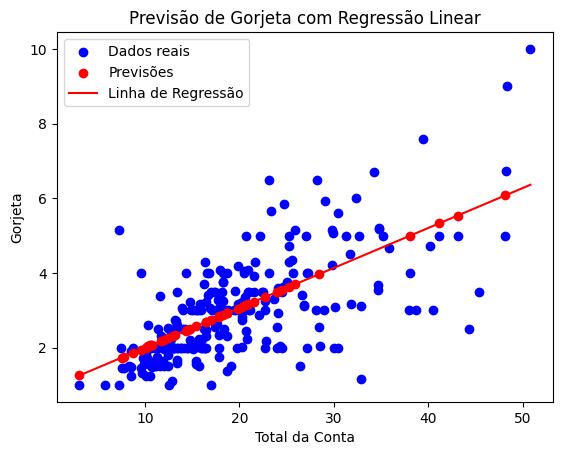

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
# Carregar o dataset de gorjetas
df = sns.load_dataset('tips')
# Mostrar as primeiras linhas do DataFrame
print(df.head())
# Selecionar a variável independente (total_bill) e a variável dependente (tip)
X = df[['total_bill']] # Total da conta
y = df['tip'] # Gorjeta
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

class LinearRegression:
    def __init__(self):
        self.w0 = 0  # Intercepto
        self.w1 = 0  # Coeficiente da inclinação

    def fit(self, X, y):
        """Ajusta o modelo aos dados de treinamento."""
        n = len(X)
        X_flat = X.values.flatten()  # Converte o DataFrame em um array NumPy
        self.w1 = (n * np.dot(X_flat, y) - np.sum(X_flat) * np.sum(y)) / (n * np.dot(X_flat, X_flat) - np.sum(X_flat) ** 2)
        self.w0 = np.mean(y) - self.w1 * np.mean(X_flat)

    def predict(self, X):
        """Faz previsões com base nos dados de entrada."""
        return self.w0 + self.w1 * X.values.flatten()  # Converte o DataFrame em um array NumPy


# Usando nosso modelinho criado anteriormente
model = LinearRegression()
model.fit(X_train, y_train)

# Prever os valores de y para os dados de teste
y_pred = model.predict(X_test)

# Coeficientes
print(f'Coeficiente (intercepto): w0 = {model.w0:.3f}')
print(f'Coeficiente (slope): w1 = {model.w1:.3f}')

# Criar um intervalo de valores para plotar a linha de regressão
X_range = np.linspace(X['total_bill'].min(), X['total_bill'].max(), 100).reshape(-1, 1)
y_range = model.predict(pd.DataFrame(X_range))

# Plotando os resultados
plt.scatter(X, y, label='Dados reais', color='blue')  # Dados reais
plt.scatter(X_test, y_pred, label='Previsões', color='red')  # Previsões
plt.plot(X_range, y_range, color='red', label='Linha de Regressão')  # Linha de regressão
plt.xlabel('Total da Conta')
plt.ylabel('Gorjeta')
plt.title('Previsão de Gorjeta com Regressão Linear')
plt.legend()
plt.show()

In [ ]:
# Calcular as previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Cálculo do RSE
residuals = y_test - y_pred  # Erros
RSE = np.sqrt(np.sum(residuals**2) / (len(y_test) - 2))  # n - 2 para o número de graus de liberdade

# Cálculo do R²
SS_res = np.sum(residuals**2)  # Soma dos quadrados dos resíduos
SS_tot = np.sum((y_test - np.mean(y_test))**2)  # Soma total dos quadrados
R_squared = 1 - (SS_res / SS_tot)

# Resultados
print(f'Erro Padrão Residual (RSE): {RSE:.3f}')
print(f'Coeficiente de Determinação (R²): {R_squared:.3f}')


Erro Padrão Residual (RSE): 0.770
Coeficiente de Determinação (R²): 0.545


In [ ]:
total_bill_input = 80 # Previsão para um total da conta de 80 U$
predicted_tip = model.predict(pd.DataFrame([[total_bill_input]]))

print(f'A previsão de gorjeta para uma conta de U${total_bill_input} é de U${predicted_tip[0]:.2f}.')

A previsão de gorjeta para uma conta de U$80 é de U$9.48.
